In [25]:
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at

predict_data_dir = '../datasets/demo/images'
load_path = 'checkpoints/fasterrcnn_05011559_0.6928293476334766'

You'll need to download pretrained model from [Baidu Drive](https://pan.baidu.com/s/11eLZfDzwwr3NPM4zNGXx4g?pwd=rjh3), and move it into ```checkpoints```.

In [26]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()
trainer = trainer.load(load_path)

Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


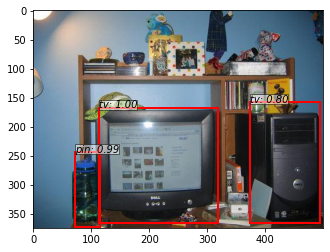

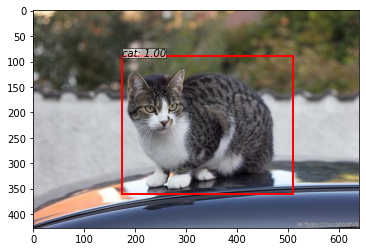

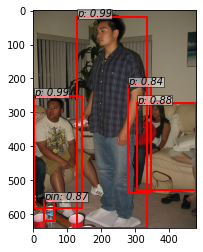

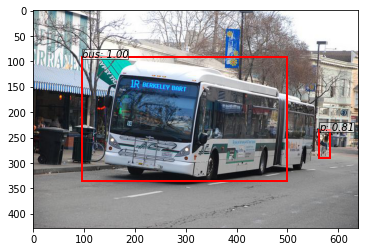

In [27]:
for img_file in os.listdir(predict_data_dir):
    img_file = os.path.join(predict_data_dir, img_file)
    img = read_image(img_file, color=True)
    img = t.from_numpy(img)[None]
    _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
    vis_bbox(at.tonumpy(img[0]),
            at.tonumpy(_bboxes[0]),
            at.tonumpy(_labels[0]).reshape(-1),
            at.tonumpy(_scores[0]).reshape(-1))